<a href="https://colab.research.google.com/github/Sadhurahavan5555/Facial_Emotion_Detector/blob/main/trainmodel2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scipy
!pip install numpy
!pip install opencv-contrib-python
!pip install tensorflow
!pip install kagglehub


In [ ]:
import kagglehub

path = kagglehub.dataset_download("msambare/fer2013")

print("Path to dataset files:", path)

100%|██████████| 60.3M/60.3M [00:02<00:00, 23.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1


In [ ]:
import scipy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

In [ ]:
train_data_dir = '/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train'
test_data_dir = '/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/test'

In [ ]:
train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_data = ImageDataGenerator(rescale=1./255)

train_generator = train_data.flow_from_directory(
    train_data_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle = True
)
test_generator = test_data.flow_from_directory(
    test_data_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle = True
)

class_lable = ['Angry','Sad','Happy','Disgust','Surprise','Netural','Fear']
img,lable = train_generator.__next__()

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 44, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,489,095 (9.50 MB)

 Trainable params: 2,489,095 (9.50 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:

train_path = '/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train'
test_path = '/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/test'

num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)

num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)

print(num_train_imgs)
print(num_test_imgs)
epochs = 30

history = model.fit(train_generator,
    steps_per_epoch=num_train_imgs // 32,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=num_test_imgs // 32
)


model.save('model.h5')

28709
7178
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/897 ━━━━━━━━━━━━━━━━━━━━ 7:56 1s/step - accuracy: 0.2450 - loss: 1.8233

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


897/897 ━━━━━━━━━━━━━━━━━━━━ 523s 578ms/step - accuracy: 0.2525 - loss: 1.8049 - val_accuracy: 0.3070 - val_loss: 1.6878
Epoch 2/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 515s 572ms/step - accuracy: 0.3156 - loss: 1.6903 - val_accuracy: 0.4242 - val_loss: 1.4987
Epoch 3/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 523s 582ms/step - accuracy: 0.3890 - loss: 1.5644 - val_accuracy: 0.4691 - val_loss: 1.3750
Epoch 4/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 515s 572ms/step - accuracy: 0.4401 - loss: 1.4489 - val_accuracy: 0.5072 - val_loss: 1.2761
Epoch 5/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 506s 563ms/step - accuracy: 0.4766 - loss: 1.3730 - val_accuracy: 0.5210 - val_loss: 1.2438
Epoch 6/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 510s 568ms/step - accuracy: 0.4944 - loss: 1.3281 - val_accuracy: 0.5421 - val_loss: 1.1945
Epoch 7/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 515s 573ms/step - accuracy: 0.5098 - loss: 1.2856 - val_accuracy: 0.5534 - val_loss: 1.1837
Epoch 8/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 564s 575ms/step - accuracy: 0.5171 - loss: 1.26

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

In [ ]:
model = load_model('/content/model.h5')

face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/multiface_rec/haarcascade_frontalface_default.xml')
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/multiface_rec/test3.jpg")
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(grey, 1.1, minNeighbors=5)
#emotions_label = {0: 'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
emotions_label = {0: 'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Neutral', 5:'Sad', 6:'Surprise'}


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


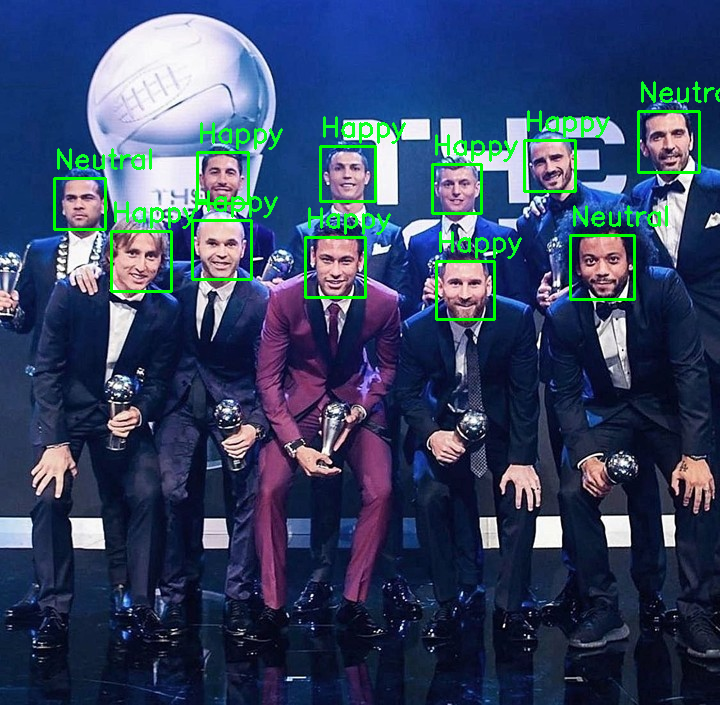

In [ ]:
*for (x, y, w, h) in faces:
    face_image = grey[y:y+h, x:x+w]
    resized_face = cv2.resize(face_image, (48, 48))
    normalized_face = resized_face / 255.0
    reshaped_face = np.reshape(normalized_face, (1, 48, 48, 1))

    prediction = model.predict(reshaped_face)
    label_index = np.argmax(prediction, axis=1)[0]
    emotion = emotions_label[label_index]
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(img, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

cv2.imwrite("output2.jpg", img)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

In [ ]:
model = load_model('/content/model.h5')

face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/multiface_rec/haarcascade_frontalface_default.xml')
emotions_label = {0: 'Angry', 1: 'Sad', 2: 'Happy', 3: 'Disgust', 4: 'Surprise', 5: 'Neutral', 6: 'Fear'}

cap = cv2.VideoCapture(0)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
while True:
    ret, frame = cap.read()
    grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(grey, 1.1, minNeighbors=5)

    for (x, y, w, h) in faces:
        face_image = grey[y:y+h, x:x+w]

        resized_face = cv2.resize(face_image, (48, 48))
        normalized_face = resized_face / 255.0
        reshaped_face = np.reshape(normalized_face, (1, 48, 48, 1))
        prediction = model.predict(reshaped_face)
        label_index = np.argmax(prediction, axis=1)[0]
        emotion = emotions_label[label_index]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    cv2_imshow(frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
import cv2

In [ ]:
video = cv2.VideoCapture(0)
while True:
    ret, frame = video.read()
    grey = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    cv.imshow('frame',frame)
    cv2.waitKey(1)
video.release()
cv2.destroyAllWindows()

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

NotAllowedError: The request is not allowed by the user agent or the platform in the current context.


In [ ]:
!git clone https://github.com/SHAIK-AFSANA/facialemotionrecognizerinrealtime.git

Cloning into 'facialemotionrecognizerinrealtime'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 23 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (23/23), 21.11 MiB | 13.63 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
# Import necessary libraries
from google.colab import output
import cv2
import numpy as np

# JavaScript code to access the webcam
output.eval_js('''
async function getVideo() {
  const video = document.createElement('video');
  video.width = 640;
  video.height = 480;
  const stream = await navigator.mediaDevices.getUser Media({video: true});
  video.srcObject = stream;
  await new Promise((resolve) => video.onloadedmetadata = resolve);
  video.play();
  return video;
}
''')

# Function to capture image from the webcam
def capture_image():
    video = getVideo()
    frame = np.array(video)
    return frame

# Capture and display the image
image = capture_image()
cv2.imshow('Captured Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

MessageError: SyntaxError: unexpected token: identifier

In [ ]:
import cv2

# Create a VideoCapture object to capture video from the webcam
cap = cv2.VideoCapture(0)

# Check if the camera opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Get the default resolutions of the frame
frame_width = int(cap.get(3))  # Width
frame_height = int(cap.get(4))  # Height

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Codec
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (frame_width, frame_height))

# Loop to capture frames
while True:
    ret, frame = cap.read()  # Read a frame
    if not ret:
        print("Error: Could not read frame.")
        break

    # Write the frame to the output file
    out.write(frame)

    # Display the resulting frame
    cv2.imshow('Video Frame', frame)

    # Press 'q' to exit the recording
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the VideoCapture and VideoWriter objects
cap.release()
out.release()

# Close all OpenCV windows
cv2.destroyAllWindows()

Error: Could not open video.
Error: Could not read frame.


In [ ]:
import kagglehub

# Download latest version
path_save = '/content/drive/MyDrive/Colab Notebooks/multiface_rec'
path = kagglehub.dataset_download("davilsena/ckdataset",path_save)

print("Path to dataset files:", path)

KaggleApiHTTPError: 404 Client Error.

Resource not found at URL: https://www.kaggle.com/datasets/davilsena/ckdataset/versions/2
The server reported the following issues: Not found
Please make sure you specified the correct resource identifiers.

In [ ]:
!pip install kagglehub

import kagglehub

# Download latest version
path_save = '/content/drive/MyDrive/Colab Notebooks/multiface_rec'
# Provide path_save as the second argument to dataset_download
path = kagglehub.dataset_download("davilsena/ckdataset", path_save)

print("Path to dataset files:", path)

KaggleApiHTTPError: 404 Client Error.

Resource not found at URL: https://www.kaggle.com/datasets/davilsena/ckdataset/versions/2
The server reported the following issues: Not found
Please make sure you specified the correct resource identifiers.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/davilsena/ckdataset/versions/2/ckextended.csv')

print(df.head())

   emotion                                             pixels     Usage
0        6  36 39 35 25 19 11 8 7 3 13 15 9 21 57 75 90 10...  Training
1        6  88 74 19 4 5 5 3 12 8 21 15 21 15 18 24 29 32 ...  Training
2        6  9 2 4 7 1 1 1 0 7 29 49 76 115 141 156 169 177...  Training
3        6  104 106 108 104 95 50 60 61 58 83 126 133 139 ...  Training
4        6  68 72 67 67 6 2 1 1 1 1 1 14 24 24 38 65 79 94...  Training


In [ ]:
!pip install deepface --upgrade
import cv2
from deepface import DeepFace

In [ ]:
model = DeepFace.build_model("Emotion")
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + '/content/drive/MyDrive/Colab Notebooks/multiface_rec/haarcascade_frontalface_default.xml')

ValueError: Invalid model_name passed - facial_recognition/Emotion

In [ ]:
from deepface import DeepFace

# List available models for emotion detection
available_models = DeepFace.get_model_names()
print(available_models)

AttributeError: module 'deepface.DeepFace' has no attribute 'get_model_names'

In [ ]:
cap = cv2.VideoCapture(0)

In [ ]:
while True:
    ret, frame = cap.read()
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        face_roi = gray_frame[y:y + h, x:x + w]
        resized_face = cv2.resize(face_roi, (48, 48), interpolation=cv2.INTER_AREA)
        normalized_face = resized_face / 255.0
        reshaped_face = normalized_face.reshape(1, 48, 48, 1)
        preds = model.predict(reshaped_face)[0]
        emotion_idx = preds.argmax()
        emotion = emotion_labels[emotion_idx]

        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.putText(frame, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

    cv2.imshow('Real-time Emotion Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break